<a href="https://colab.research.google.com/github/iskra3138/RL/blob/main/CS234_03_Model_Free_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 1. MC (Monte Carlo) for On Policy Q Evaluation

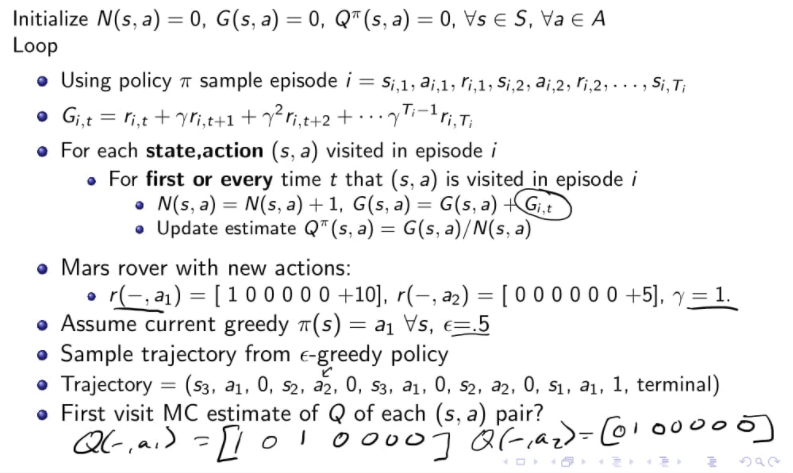

In [16]:
# First Visit
R = np.array([[1,0,0,0,0,0,10],[0,0,0,0,0,0,5]])

Trajectories = [[3,1,0,2,2,0,3,1,0,2,2,0, 1, 1, 1]]

Q = np.zeros_like(R)
N = np.zeros_like(R)
G = np.zeros_like(R)

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  action_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 1 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  episode_N = np.zeros_like(R)
  episode_G = np.zeros_like(reward_Trajectory)
  for t, _ in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  t = 0
  for s, a in zip(state_Trajectory, action_Trajectory):
    if episode_N[a][s] == 0 :
      episode_N[a][s] += 1
      N[a][s] += 1
      G[a][s] += episode_G[t]
      Q[a][s] = G[a][s] / N[a][s]
    t+=1
print (Q)

[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]]


# Monte Carlo Online Control / On Policy Improvement

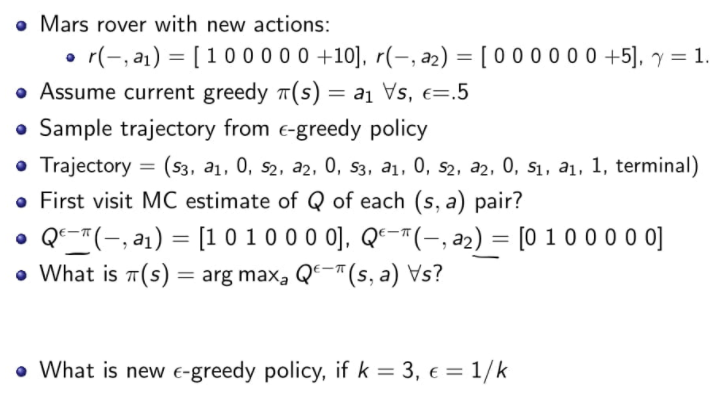

In [74]:
# First Visit
R = np.array([[1,0,0,0,0,0,10],[0,0,0,0,0,0,5]])

Trajectories = [[3,1,0,2,2,0,3,1,0,2,2,0, 1, 1, 1]]

Q = np.zeros_like(R)
N = np.zeros_like(R)
G = np.zeros_like(R)

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  action_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 1 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  episode_N = np.zeros_like(R)
  episode_G = np.zeros_like(reward_Trajectory)
  for t, _ in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  t = 0
  for s, a in zip(state_Trajectory, action_Trajectory):
    if episode_N[a][s] == 0 :
      episode_N[a][s] += 1
      N[a][s] += 1
      G[a][s] += episode_G[t]
      Q[a][s] = G[a][s] / N[a][s]
    t+=1
# 동일한 값일 때 첫번째 값이 argmax로 나오는 출력 코드    
print (np.argmax(Q, axis = 0))
# 동일한 값(break)일 때, random한 값이 argmax로 나오는 출력 코드 ([0 1 0 random~~~])
print (np.argmax(np.random.random(Q.shape) * (Q==Q.max(axis=0)), axis = 0))

[0 1 0 0 0 0 0]
[0 1 0 0 0 1 1]


In [118]:
k=3
epsilon = 1/k

# epsilon 적용
prob = np.random.binomial(1, epsilon)
if prob == 0 :
  print (np.argmax(Q, axis = 0))
else :
  print (np.random.randint(2, size=7))

[1 1 1 1 1 0 0]
